# Food in Art

In [36]:
import pandas as pd
import torch
from transformers import OwlViTProcessor, OwlViTForObjectDetection
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

#### Choose device

In [37]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

In [38]:
# Load the processor and model
processor = OwlViTProcessor.from_pretrained("google/owlvit-base-patch32")
model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch32").to(device)


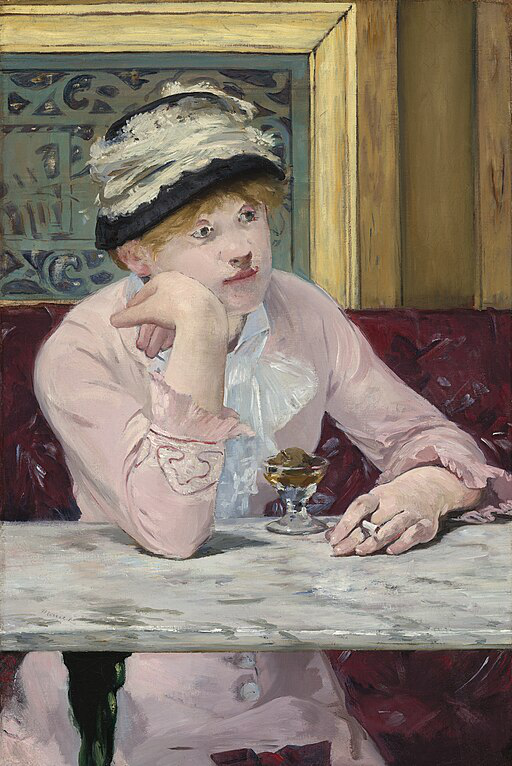

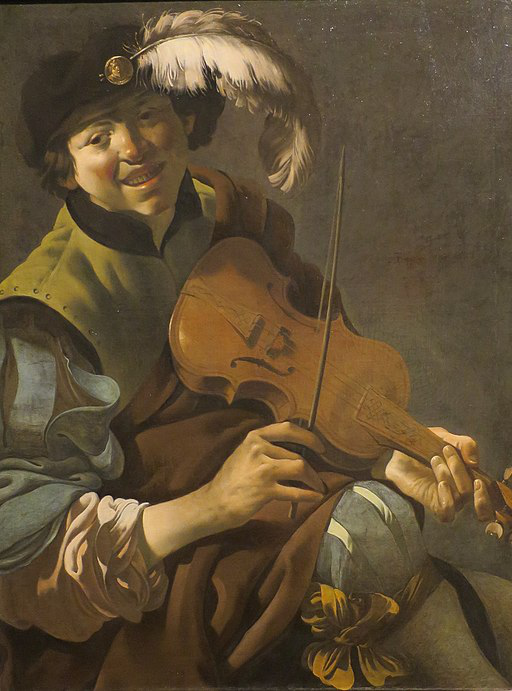

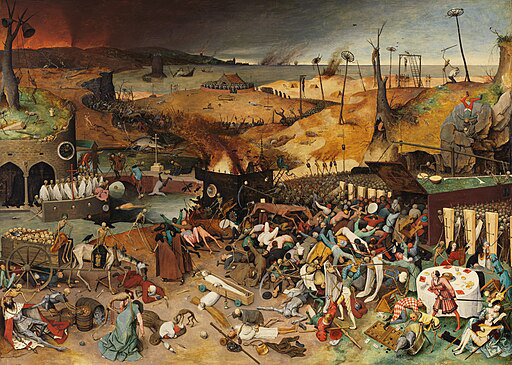

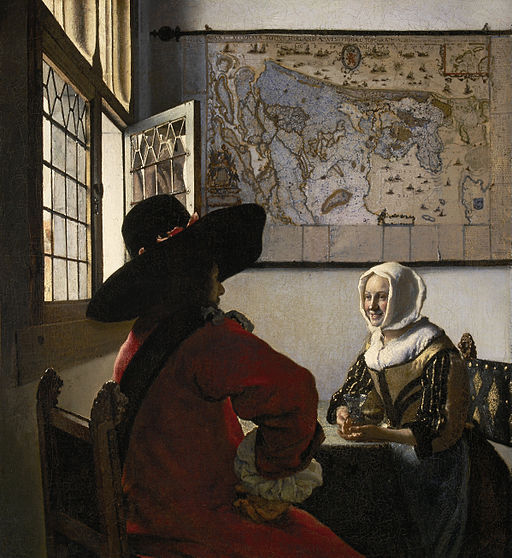

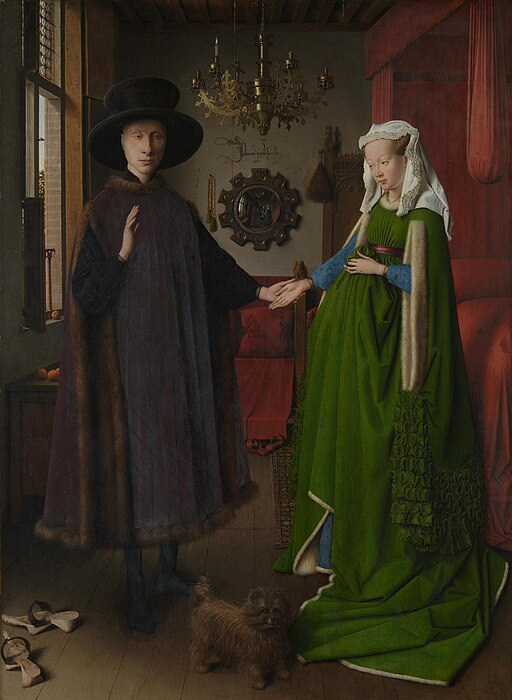

In [39]:
image_folder = 'img/img_512/'
image_names = ["Edouard_Manet_-_The_Plum_-_National_Gallery_of_Art.jpg", "'A Boy Violinist' painting by Hendrick Terbrugghen, Dayton Art Institute.JPG", "The_Triumph_of_Death_by_Pieter_Bruegel_the_Elder.jpg","Johannes_Vermeer_-_De_Soldaat_en_het_Lachende_Meisje_-_Google_Art_Project.jpg","Van_Eyck_-_Arnolfini_Portrait.jpg"]
image_paths = [os.path.join(image_folder, image_name.replace('_', ' ')) for image_name in image_names]
images = [Image.open(image_path) for image_path in image_paths]


# Display the image
for image in images:
    display(image)

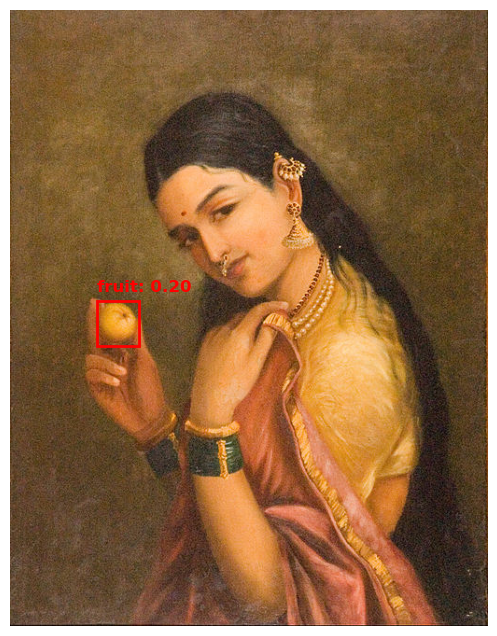

In [40]:
import torch
from transformers import OwlViTProcessor, OwlViTForObjectDetection
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Set the device
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

# Load the processor and model
processor = OwlViTProcessor.from_pretrained("google/owlvit-base-patch32")
model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch32").to(device)

# Load the image
#image = Image.open(f'img/img_512/{"Fruit Dish on a Garden Chair LACMA M.54.41.1.jpg".replace('_', ' ')}')
image = Image.open(f'img/img_512/{'Raja Ravi Varma - Woman Holding a Fruit - Google Art Project.jpg'.replace('_', ' ')}')

# List of food items
food_items = ['this represents a feast or a banquet']
food_items = [' this looks like a fruit']

# Prepare inputs
inputs = processor(text=food_items, images=image, return_tensors="pt").to(device)

# Perform inference
with torch.no_grad():
    outputs = model(**inputs)

# Post-process the outputs
target_sizes = torch.Tensor([image.size[::-1]]).to(device)
results = processor.post_process_object_detection(outputs=outputs, target_sizes=target_sizes)[0]
# Visualize the results
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(image)

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    if score >= 0.01:
        box = box.to("cpu").numpy()
        xmin, ymin, xmax, ymax = box
        width, height = xmax - xmin, ymax - ymin
        rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        #ax.text(xmin, ymin - 10, f"{food_items[label]}: {score:.2f}", color='red', fontsize=12, weight='bold')
        ax.text(xmin, ymin - 10, f"fruit: {score:.2f}", color='red', fontsize=12, weight='bold')

plt.axis('off')
plt.show()